# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | jutai
Processing Record 5 of Set 1 | flin flon
Processing Record 6 of Set 1 | zelenogorsk
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | igarka
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | bay roberts
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | crane
Processing Record 16 of Set 1 | verkhnevilyuysk
Processing Record 17 of Set 1 | dawson creek
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | karyes
Processing Record 20 of Set 1 | farjestaden
City not found. Skipping...
Processing Record 21 of Set 1 | qal'at bishah
City not found. Skipping...
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.42,76,95,10.54,TF,1723139127
1,waitangi,-43.9535,-176.5597,11.04,79,68,6.64,NZ,1723139128
2,grytviken,-54.2811,-36.5092,-12.31,87,87,7.72,GS,1723139129
3,jutai,-5.1833,-68.9000,38.36,27,1,0.50,BR,1723139131
4,flin flon,54.7682,-101.8650,17.91,52,75,3.09,CA,1723139029


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.42,76,95,10.54,TF,1723139127
1,waitangi,-43.9535,-176.5597,11.04,79,68,6.64,NZ,1723139128
2,grytviken,-54.2811,-36.5092,-12.31,87,87,7.72,GS,1723139129
3,jutai,-5.1833,-68.9000,38.36,27,1,0.50,BR,1723139131
4,flin flon,54.7682,-101.8650,17.91,52,75,3.09,CA,1723139029


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

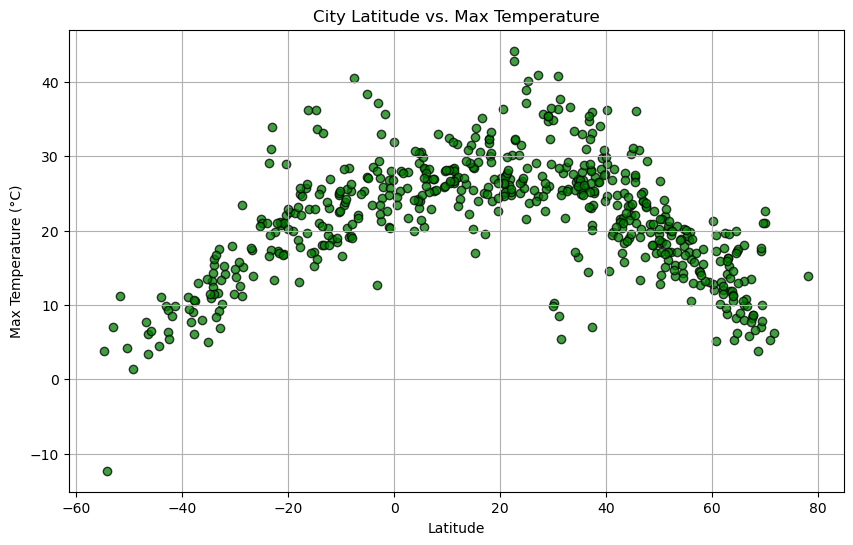

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k", facecolors="green", alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

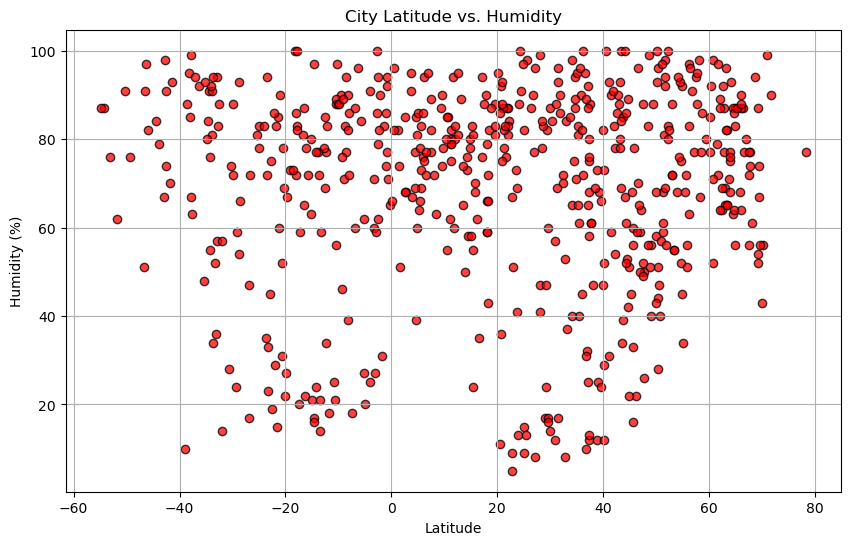

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", facecolors="red", alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

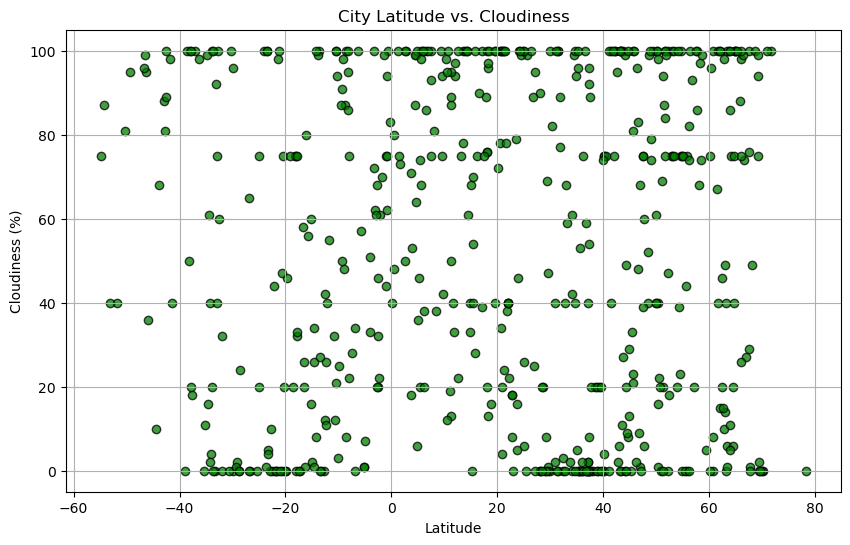

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", facecolors="green", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

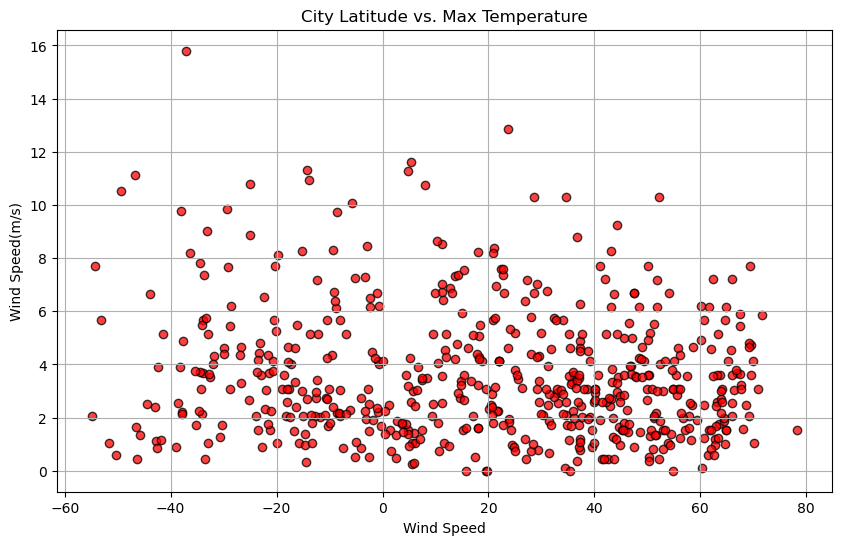

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", facecolors="red", alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolors="k", facecolors="blue", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values)+2, max(y_values)-2), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
    print(f"r-squared: {rvalue**2}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,flin flon,54.7682,-101.8650,17.91,52,75,3.09,CA,1723139029
5,zelenogorsk,56.1147,94.5861,16.23,97,82,1.23,RU,1723139133
10,igarka,67.4667,86.5833,13.50,56,100,5.43,RU,1723139138
11,hamilton,39.1834,-84.5333,29.79,68,20,4.12,US,1723139109
12,bay roberts,47.5999,-53.2648,23.36,50,6,3.58,CA,1723139140


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.42,76,95,10.54,TF,1723139127
1,waitangi,-43.9535,-176.5597,11.04,79,68,6.64,NZ,1723139128
2,grytviken,-54.2811,-36.5092,-12.31,87,87,7.72,GS,1723139129
3,jutai,-5.1833,-68.9000,38.36,27,1,0.50,BR,1723139131
6,avarua,-21.2078,-159.7750,21.03,60,100,1.54,CK,1723139134


###  Temperature vs. Latitude Linear Regression Plot

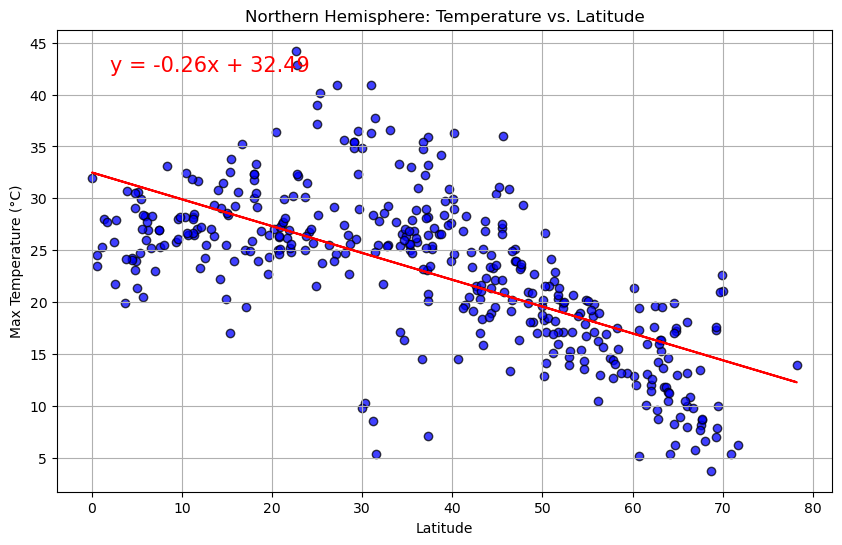

r-squared: 0.44220040896226026


In [21]:
# Linear regression on Northern Hemisphere
plot_linear_regression( northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (°C)")

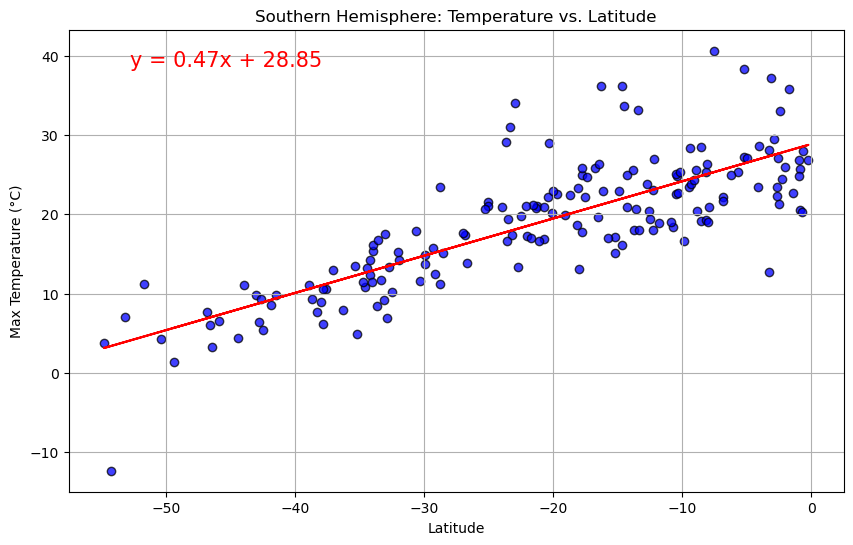

r-squared: 0.637798858485551


In [22]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (°C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

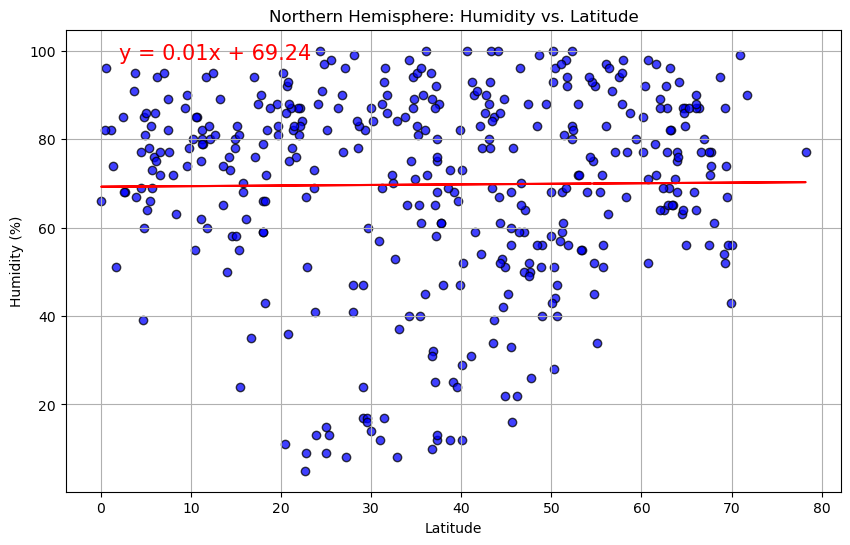

r-squared: 0.0001325097522545952


In [23]:
# Northern Hemisphere
plot_linear_regression( northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Northern Hemisphere: Humidity vs. Latitude","Latitude", "Humidity (%)")

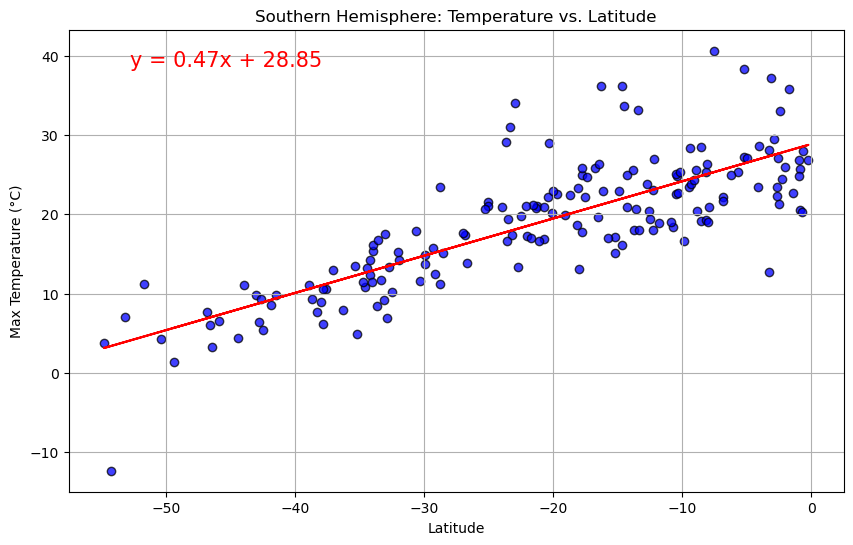

r-squared: 0.637798858485551


In [24]:
# Southern Hemisphere
plot_linear_regression( southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (°C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

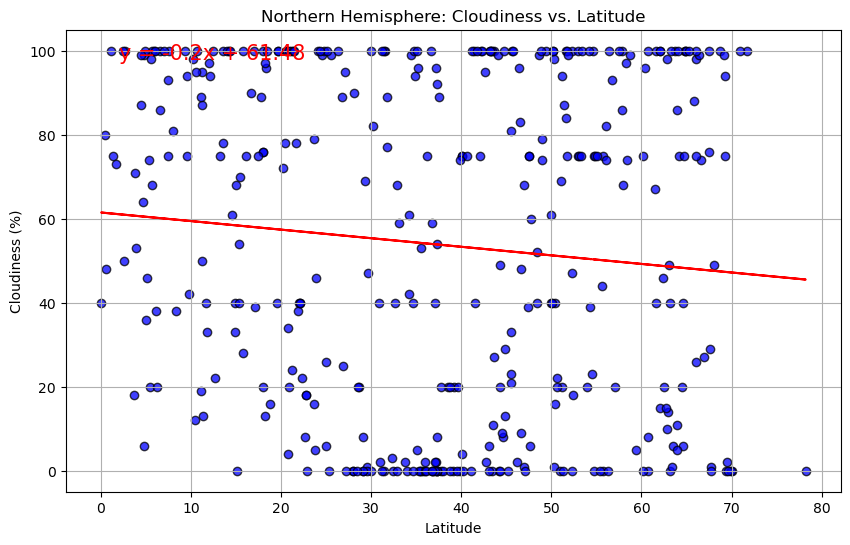

r-squared: 0.010084341431874057


In [25]:
# Northern Hemisphere
plot_linear_regression( northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

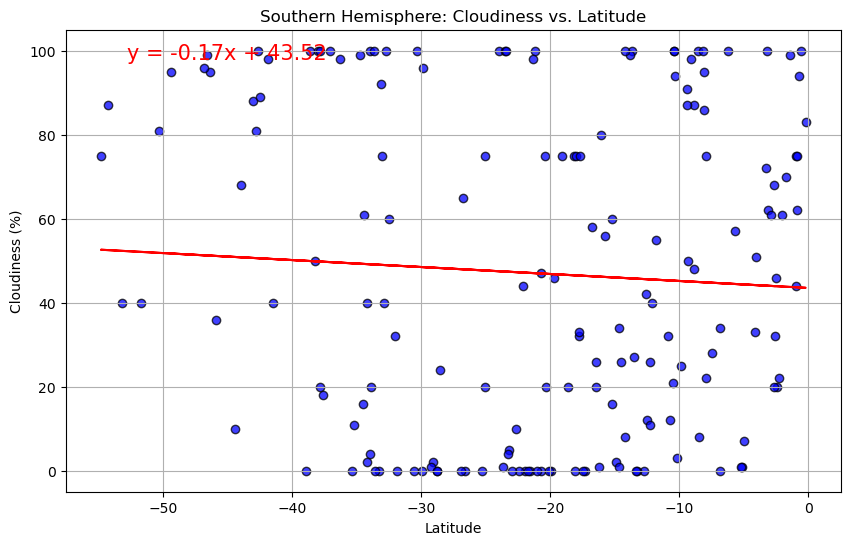

r-squared: 0.003671719696722145


In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

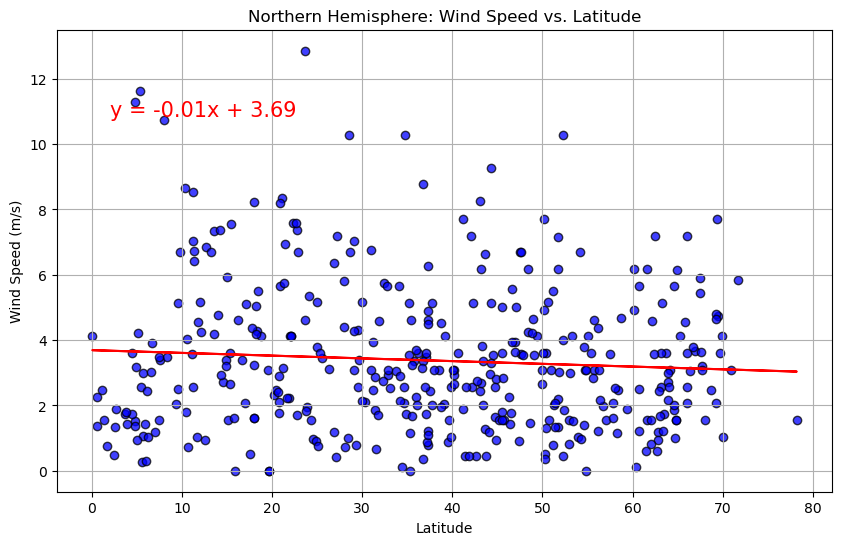

r-squared: 0.005300533702564329


In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")

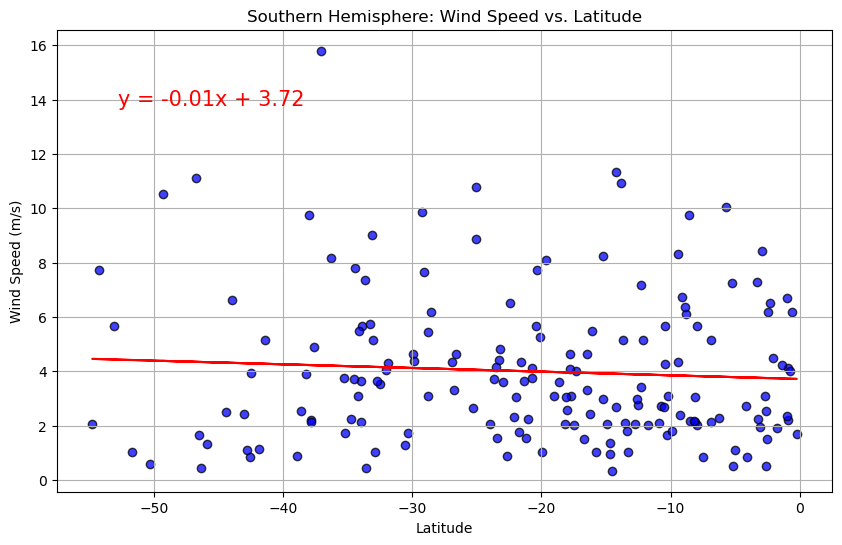

r-squared: 0.0047169016177065985


In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")

Northern Hemisphere: Temprature Vs. Latitude: As latitude increases 
(moving away from the equator towards the poles), the temperature generally decreases. 
This is evident from the negative slope of the regression line, indicating an inverse 
relationship between latitude and temperature.

In contrast to Northern Hemisphere, the temprature generally increases as Latitude 
increases in the Southern Hemisphere. 

The relationship between latitude and humidity in the Northern Hemisphere shows a 
slight positive trend, but it is not very strong. This suggests that humidity slightly 
increases as you move towards higher latitudes, but other factors might also influence 
humidity levels.

In the Southern Hemisphere, the relationship between latitude and humidity shows 
a srong positive trend. This indicates that humidity tends to increase as you move 
towards higher latitudes, though the correlation is not very strong.

The plot shows no strong relationship between latitude and cloudiness in the Northern 
Hemisphere. The regression line has a negative slope, suggesting a decrease
in cloudiness with latitude, but the relationship is weak.

The relationship between latitude and wind speed in the Northern Hemisphere shows a 
slight negative trend. This indicates that wind speed tends to decrease as you move 
towards higher latitudes, but the correlation is not very strong.

The trend for latitude and wind speed in the Southern Hemisphere is similar to that
of the Northern Hemisphere 